In [111]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("dark")
import pandas as pd
import glob
import datetime


### Loading Dataset

In [112]:
file_list = []
for file in glob.glob("dataset\\*.csv"):
    print(file)
    file_list.append(file)
    # df = pd.read_csv(file)

dataset\IRX6XAFF0005.csv
dataset\IRX6XALS0002.csv
dataset\IRX6XS300003.csv
dataset\IRX6XSLC0000.csv
dataset\IRX6XSNT0009.csv
dataset\IRX6XTAL0001.csv
dataset\IRX6XTDP0004.csv
dataset\IRX6XTPI0009.csv
dataset\IRX6XTPI0009[2022-05-23-10-18-57].csv
dataset\IRX6XTPI0025.csv
dataset\IRX6XWAI0001.csv
dataset\IRX6XWTH0001.csv
dataset\IRXWXEXR0007.csv
dataset\IRXWXEXR0023.csv
dataset\IRXWXOCI0001.csv
dataset\IRXWXOCI0027.csv
dataset\IRXYXTPI0009.csv
dataset\IRXYXTPI0025.csv
dataset\IRXZXAGR0009.csv
dataset\IRXZXBNK0006.csv
dataset\IRXZXCMI0000.csv
dataset\IRXZXCML0005.csv
dataset\IRXZXCNS0007.csv
dataset\IRXZXENG0009.csv
dataset\IRXZXEXR0004.csv
dataset\IRXZXEXR0020.csv
dataset\IRXZXFIN0006.csv
dataset\IRXZXFOD0000.csv
dataset\IRXZXHTL0003.csv
dataset\IRXZXIND0008.csv
dataset\IRXZXINS0001.csv
dataset\IRXZXINV0006.csv
dataset\IRXZXITG0009.csv
dataset\IRXZXLSG0005.csv
dataset\IRXZXMIN0007.csv
dataset\IRXZXMML0003.csv
dataset\IRXZXMNF0000.csv
dataset\IRXZXMOT0003.csv
dataset\IRXZXMTL0006.csv
data

In [113]:
df = pd.read_csv("dataset/IRX6XTPI0009.csv", encoding='utf-16')
df.drop(columns=["<TICKER>", "<COl12>", "<COl13>", "<LAST>"], inplace=True)
df["<DTYYYYMMDD>"] = pd.to_datetime(df["<DTYYYYMMDD>"], format="%Y%m%d")
df.rename(columns={"<DTYYYYMMDD>": "Date"}, inplace=True)
df.head()

,Date,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>,<OPENINT>.1,<OPENINT>.2
0,2008-12-06,9248.8,9248.8,9178.3,9178.3,8539624,1.855769e+10,1095,0.0
1,2008-12-07,9178.3,9178.3,9130.5,9130.5,11752353,2.051911e+10,1666,9178.3
2,2008-12-08,9102.7,9103.4,9089.2,9089.2,15299115,6.007124e+10,1873,9130.5
3,2008-12-10,9071.6,9071.6,9023.7,9023.7,15689653,3.258769e+10,1737,9089.2
4,2008-12-13,8973.3,8973.0,8973.3,8973.3,31428174,6.562290e+10,3108,9023.7


In [114]:
# Filter to last years data
df = df[df["Date"] >= "2021-05-23"]
df.reset_index(inplace=True, drop=True)
df.head()

,Date,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<OPENINT>,<OPENINT>.1,<OPENINT>.2
0,2021-05-23,1123500.0,1123500.0,1107900.3,1107900.3,2736872962,1.429308e+13,195077,4.429764e+10
1,2021-05-24,1105220.0,1105220.0,1095726.2,1095726.2,3100360796,1.610564e+13,252943,4.379279e+10
2,2021-05-25,1095800.0,1105850.0,1105446.0,1105446.0,3828842175,2.090582e+13,349959,4.413669e+10
3,2021-05-26,1106380.0,1110560.0,1109369.6,1109369.6,3187572389,1.646125e+13,389162,4.429966e+10
4,2021-05-29,1111520.0,1139620.0,1139480.9,1139480.9,5193610223,2.851750e+13,395488,4.558550e+10


<AxesSubplot:xlabel='Date'>

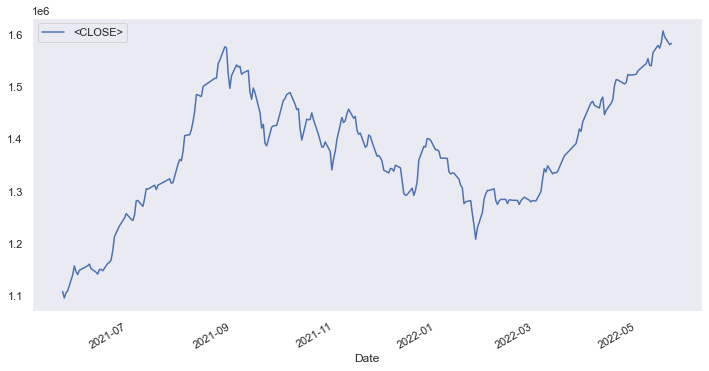

In [115]:
df.plot(x="Date", y="<CLOSE>", figsize=(12, 6))

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         238 non-null    datetime64[ns]
 1   <OPEN>       238 non-null    float64       
 2   <HIGH>       238 non-null    float64       
 3   <LOW>        238 non-null    float64       
 4   <CLOSE>      238 non-null    float64       
 5   <VOL>        238 non-null    int64         
 6   <OPENINT>    238 non-null    float64       
 7   <OPENINT>.1  238 non-null    int64         
 8   <OPENINT>.2  238 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 16.9 KB


In [117]:
data = df["<CLOSE>"].to_numpy()

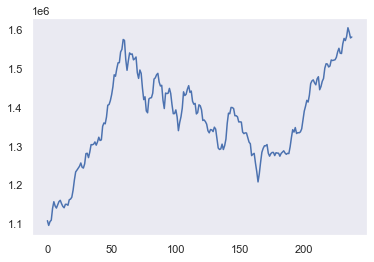

In [118]:
plt.plot(data)

### Preprocessing

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))


In [120]:
# train_size = len(data)*0.70
# Stratified train test split
from sklearn.model_selection import train_test_split


# train_data, test_data = data[0:int(train_size)], data[int(train_size):]
# len(train_data), len(test_data)

### Create Dataset

In [121]:
def create_dataset(dataset, time_steps=1):
    data_x, data_y = [], []
    for i in range(len(dataset)-time_steps-1):
        data_x.append(dataset[i:(i+time_steps)])

        # check if the close price is higher than the previous day
        if dataset[i+time_steps] > dataset[i+time_steps-1]:
            data_y.append(1)
        else:
            data_y.append(0)
            
    return np.array(data_x), np.array(data_y).reshape(-1, 1)

In [122]:
time_steps = 15
x_data, y_data = create_dataset(data, time_steps)

print("x_data shape:", x_data.shape)
print("y_data shape:", y_data.shape)

# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)
# print("x_test shape:", x_test.shape)
# print("y_test shape:", y_test.shape)

# Note: LSTM requires input shape to be (sample, timesteps, feature_size) in this case: (155, 10, 1)


x_data shape: (222, 15, 1)
y_data shape: (222, 1)


In [200]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, stratify=y_data)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (155, 15, 1)
y_train shape: (155, 1)
x_test shape: (67, 15, 1)
y_test shape: (67, 1)


In [201]:
print("y_data:", np.unique(y_data, return_counts=True))
print("y_train:", np.unique(y_train, return_counts=True))
print("y_test:", np.unique(y_test, return_counts=True))

y_data: (array([0, 1]), array([ 94, 128], dtype=int64))
y_train: (array([0, 1]), array([66, 89], dtype=int64))
y_test: (array([0, 1]), array([28, 39], dtype=int64))


In [205]:
128/(94+128)

0.5765765765765766

In [206]:
89/(66+89)

0.5741935483870968

In [207]:
39/(28+39)

0.582089552238806

In [193]:
# label_0_count = np.sum(y_data == 0)
# label_1_count = np.sum(y_data == 1)
# label_0_count_current = 0
# for i in range(len(y_data)):
#     if y_data[i] == 1:
#         plt.plot(x_data[i], data[i], "ro")
#     else:
#         plt.plot(x_data[i], data[i], "bo")


y_1: (array([0, 1]), array([ 75, 102], dtype=int64))
y_2: (array([0, 1]), array([ 75, 102], dtype=int64))


### LSTM Model Creation

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=8, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(LSTM(units=50, return_sequences=False))
# model.add(LSTM(units=50))
# model.add(Dropout(0.05))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 8)                 320       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


### LSTM Model Train

In [75]:
model.fit(
    x_train,
    y_train, 
    epochs=100, 
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")))]
    )

Epoch 1/100
3/3 [==============================] - 3s 338ms/step - loss: 0.6949 - accuracy: 0.4533 - val_loss: 0.7028 - val_accuracy: 0.3393
Epoch 2/100
3/3 [==============================] - 0s 66ms/step - loss: 0.6948 - accuracy: 0.4533 - val_loss: 0.7025 - val_accuracy: 0.3393
Epoch 3/100
3/3 [==============================] - 0s 48ms/step - loss: 0.6947 - accuracy: 0.4533 - val_loss: 0.7022 - val_accuracy: 0.3393
Epoch 4/100
3/3 [==============================] - 0s 53ms/step - loss: 0.6946 - accuracy: 0.4533 - val_loss: 0.7019 - val_accuracy: 0.3393
Epoch 5/100
3/3 [==============================] - 0s 54ms/step - loss: 0.6946 - accuracy: 0.4467 - val_loss: 0.7016 - val_accuracy: 0.3393
Epoch 6/100
3/3 [==============================] - 0s 48ms/step - loss: 0.6945 - accuracy: 0.4533 - val_loss: 0.7013 - val_accuracy: 0.3393
Epoch 7/100
3/3 [==============================] - 0s 47ms/step - loss: 0.6944 - accuracy: 0.4600 - val_loss: 0.7010 - val_accuracy: 0.3393
Epoch 8/100
3/3 [==

In [70]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.5179


[0.6975001096725464, 0.5178571343421936]

0.6607142857142857

(array([0, 1]), array([19, 37], dtype=int64))

### Prediction

In [61]:
model.predict(x_test)[2]

array([0.55784726], dtype=float32)

In [63]:
model.predict(x_test[2].reshape(1, -1, 1))

array([[0.55784726]], dtype=float32)

In [81]:
y_test[2]

array([1])

### Plot Confusion Matrix

In [83]:
y_test.squeeze()

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [94]:
%%timeit
(model.predict(x_test)>0.5)

45.9 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [110]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([19, 37], dtype=int64))

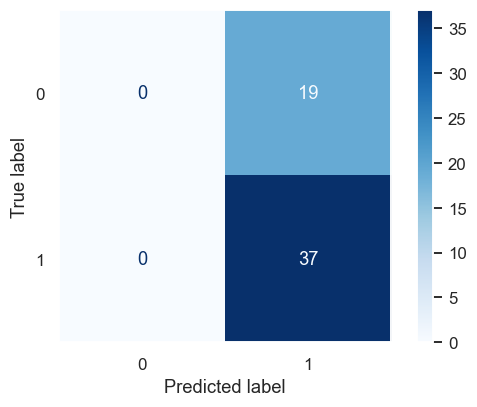

In [109]:
# Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Plot non-normalized confusion matrix

disp = ConfusionMatrixDisplay.from_predictions(y_test.squeeze(), model.predict(x_test).squeeze()>0.5, display_labels=[0, 1], cmap=plt.cm.Blues,)
disp.figure_.dpi = 110
# disp.plot(include_values=True, xticks_rotation='vertical')

plt.show()

### Tensorboard

In [65]:
%load_ext tensorboard

In [69]:
%tensorboard --logdir=logs/

^C


In [156]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [157]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)